# Machine Learning

## 4️⃣ Classification Algorithm

## What is Classification?

It is the process of identifying the class relationship of existing data and self-discriminating the class of newly observed data.

## Decision Tree

A model in which the final decision is made while selecting the appropriate node from the root.

In [1]:
import numpy as np
import pandas as pd

# A decision tree model function that separates wind speed according to the threshold value.

def binary_tree(data, threshold):
    
    yes = []
    no = []
    
    for wind in data['풍속']:
    
        # Separate by comparing with threshold value.
        if wind > threshold:
            yes.append(wind)
        else:
            no.append(wind)
    
    # Save predicted value as DataFrame.
    data_yes = pd.DataFrame({'풍속': yes, '예상 지연 여부': ['Yes']*len(yes)})
    data_no = pd.DataFrame({'풍속': no, '예상 지연 여부': ['No']*len(no)})
    
    return data_no.append(data_yes,ignore_index=True)

# Air delay data and wind speed data
Wind = [1, 1.5, 2.5, 5, 5.5, 6.5] # Feature data
Delay  = ['No', 'No', 'No', 'Yes', 'Yes', 'Yes'] # Label data

# Save data above as DataFrame
data = pd.DataFrame({'풍속': Wind, '지연 여부': Delay})
print(data,'\n')

"""
1. Use the binary_tree model to predict air delays.
"""
data_pred = binary_tree(data, threshold = 4) # When the threshold value is 4, data is classified the same as label data.
print(data_pred,'\n')

    풍속 지연 여부
0  1.0    No
1  1.5    No
2  2.5    No
3  5.0   Yes
4  5.5   Yes
5  6.5   Yes 

    풍속 예상 지연 여부
0  1.0       No
1  1.5       No
2  2.5       No
3  5.0      Yes
4  5.5      Yes
5  6.5      Yes 



### Impurity

When separating the decision tree, we separate it to minimize data **impurity**.

**Impurity** means the degree to which other data are mixed.



#### Gini Impurity

- **Gini Index** is an index that measures impurities, and is a value that quantifies and expresses the degree of statistical variance of data.

- **Gini Impurity**
    - Gini Index = $1 - $(probaility of $yes)^2$ - (probability of $no)^2$
    - Gini Impurity = $\frac{n_1}{N}Gini_1+\frac{n_2}{N}Gini_2$ ($n_i$ : The number of data on i-th child node, N : The number of data on parent node)

We will use **Gini Impurity** as a criterion for separating decision trees.

### The trade-off of the depth of the Decision Tree

The deeper the depth of the Decision Tree, the **more detailed the data can be divided**. However, too deep models can cause **overfitting**. Therefore, **too deep model should be avoided**.

### Characteristics of Deicision Tree

- The results are intuitive and easy to interpret.
- The deeper the tree depth, the more likely it is to cause overfitting problems.
- The tree's work speed after learning is very fast.

### Using *sklearn* to use Decision Tree

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

# Load iris.csv saved in sklearn library
X, Y = load_iris(return_X_y = True)

# Convert to DataFrame
df = pd.DataFrame(X, columns=['sepal.length','sepal.width', 'petal.length', 'petal.width'])
df['class'] = Y

X = df.drop(columns=['class'])
Y = df['class']

"""
1. Split data
"""
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state = 42)

# Print Original data
print('Original data : \n',df.head(),'\n')

# Preprocessed data
print('train_X : ')
print(train_X.head(),'\n')
print('train_Y : ')
print(train_Y.head(),'\n')

print('test_X : ')
print(test_X.head(),'\n')
print('test_Y : ')
print(test_Y.head())

Original data : 
    sepal.length  sepal.width  petal.length  petal.width  class
0           5.1          3.5           1.4          0.2      0
1           4.9          3.0           1.4          0.2      0
2           4.7          3.2           1.3          0.2      0
3           4.6          3.1           1.5          0.2      0
4           5.0          3.6           1.4          0.2      0 

train_X : 
    sepal.length  sepal.width  petal.length  petal.width
22           4.6          3.6           1.0          0.2
15           5.7          4.4           1.5          0.4
65           6.7          3.1           4.4          1.4
11           4.8          3.4           1.6          0.2
42           4.4          3.2           1.3          0.2 

train_Y : 
22    0
15    0
65    1
11    0
42    0
Name: class, dtype: int64 

test_X : 
     sepal.length  sepal.width  petal.length  petal.width
73            6.1          2.8           4.7          1.2
18            5.7          3.8           1

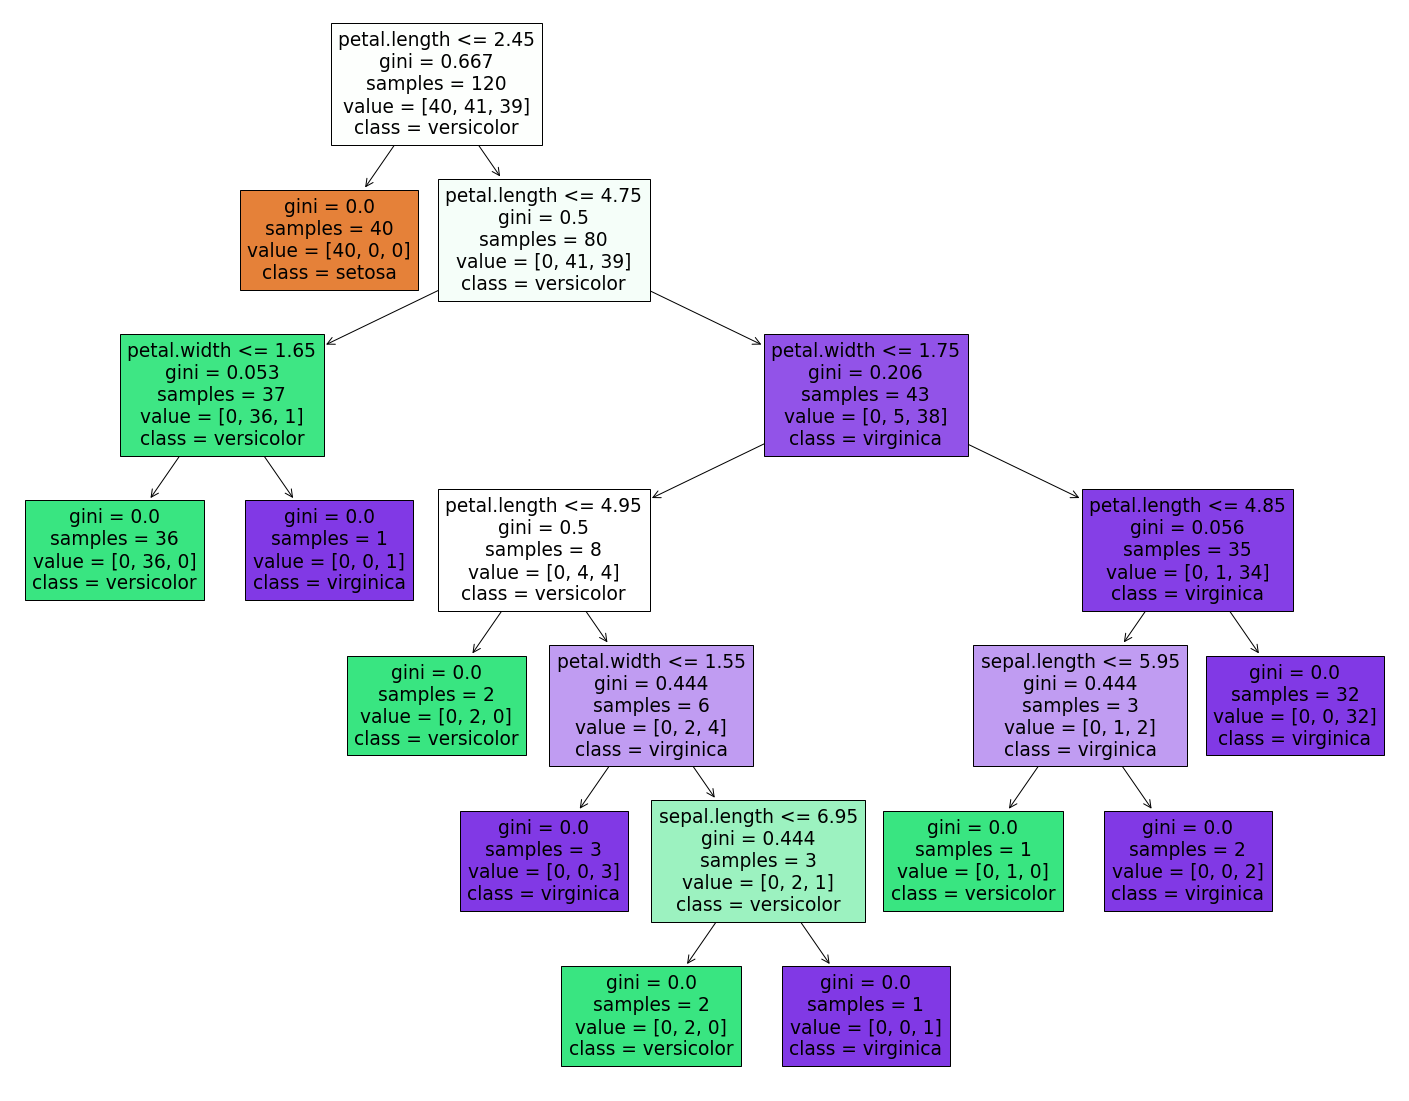

In [3]:
# Initialize Decision Tree model and operate learning
DTmodel = DecisionTreeClassifier()
DTmodel.fit(train_X, train_Y)

# Print the model after learning
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(DTmodel, 
                   feature_names=['sepal.length','sepal.width', 'petal.length', 'petal.width'],  
                   class_names=['setosa', 'versicolor', 'virginica'],
                   filled=True)

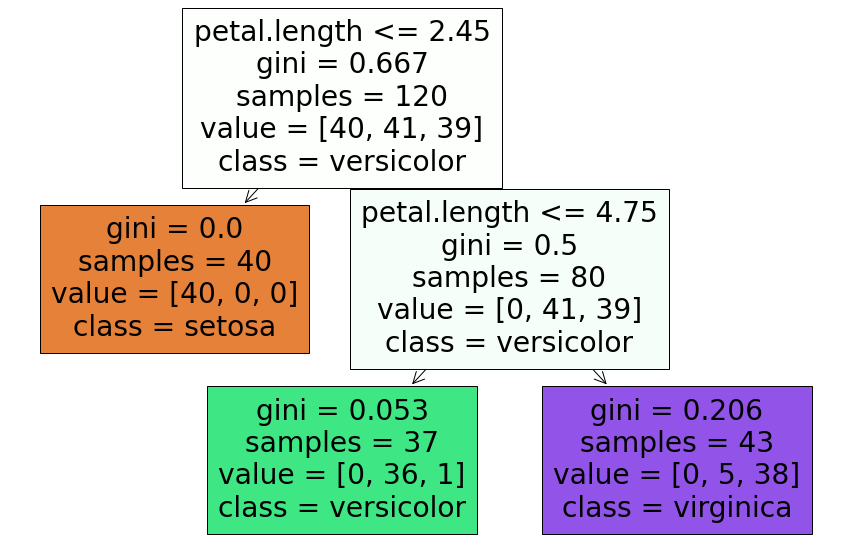

In [5]:
# You can set the max depth of decision tree as below
DTmodel_2 = DecisionTreeClassifier(max_depth=2)
DTmodel_2.fit(train_X, train_Y)

fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(DTmodel_2, 
                   feature_names=['sepal.length','sepal.width', 'petal.length', 'petal.width'],  
                   class_names=['setosa', 'versicolor', 'virginica'],
                   filled=True)

## Evaluating Classification Algorithm

### Confusion Matrix

<img src="./confusion_matrix.jpg" width = "300">

- **True Positive**: The actual positive value is predicted to be positive (Correct answer)
- **True Negative**: The actual negative value is predicted to be negative (Correct answer)

- **False Positive**: Predicting that the actual negative value is positive - **Type 1 error**
- **False Negative**: Predicting that the actual positive value is negative - **Type 2 error**

Number of total samples:  569
Number of X's feature:  30
Number of samples for test:  114
Number of samples for test which is of class 0:  43
Number of samples for test which is of class 1:  71 



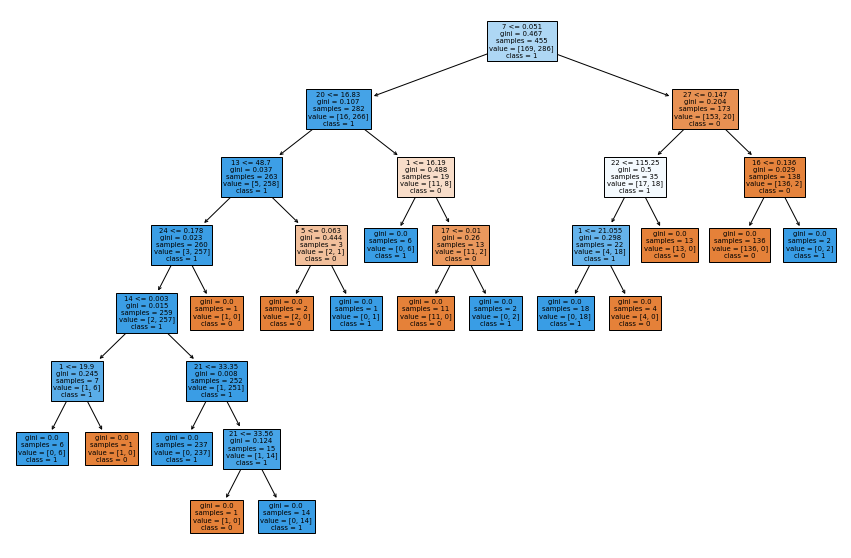

Confusion Matrix : 
 [[40  3]
 [ 3 68]]


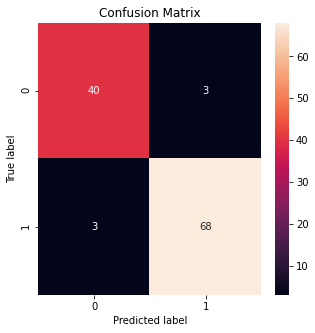

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Get data from sklearn
X, Y = load_breast_cancer(return_X_y = True)
X = np.array(X)
Y = np.array(Y)

# Print information about data
print('Number of total samples: ',len(X))
print("Number of X's feature: ",len(X[0]))

# Split data
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2, random_state = 42)

# Print splitted data
print('Number of samples for test: ',len(test_Y))
print('Number of samples for test which is of class 0: ',len(test_Y)-sum(test_Y))
print('Number of samples for test which is of class 1: ',sum(test_Y),'\n')

# Initialize DTmodel, and operate learning
DTmodel = DecisionTreeClassifier()
DTmodel.fit(train_X, train_Y)

# Visualize model
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(DTmodel, 
                   feature_names=range(30),  
                   class_names=['0', '1'],
                   filled=True)
plt.show()

# Save predicted value according to test_X
y_pred = DTmodel.predict(test_X)

"""
1. Get Confusion Matrix using confusion_matrix
"""
cm = confusion_matrix(test_Y, y_pred)
print('Confusion Matrix : \n {}'.format(cm))

# Print confusion matrix
fig = plt.figure(figsize=(5,5))
ax = sns.heatmap(cm, annot=True)
ax.set(title='Confusion Matrix',
            ylabel='True label',
            xlabel='Predicted label')
plt.show()

### Accuracy

Accuracy is the proportion of properly classified data among all data.   
It is generally used as a major evaluation method for classification models.    However, if the class ratio is **unbalanced**, there is a possibility that the reliability as the evaluation index will be lost.

$Accuracy = \frac{TP+TN}{P+N}$

In [2]:
"""
1. Get accuracy using .score(X, Y)
"""
acc_train = DTmodel.score(train_X, train_Y)
acc_test = DTmodel.score(test_X, test_Y)

# 정확도를 출력합니다.
print('train_X Accuracy: %f' % (acc_train))
print('test_X Accuracy: %f' % (acc_test))

train_X Accuracy: 1.000000
test_X Accuracy: 0.938596


### Precision

The ratio of data that is actually positive among the data classified as positive by the model.   
This value is used when data that is actually negative should not be judged positive.

$Precision = \frac{TP}{TP+FP}$

### Recall, TPR(True Positive Rate)

The ratio of data classified as positive by the model among positive data.   
This value is used when data that is actually positive should not be judged negative.

$Recall = \frac{TP}{TP+FN} = \frac{TP}{P}$

In [4]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Save predicted value
y_pred_train = DTmodel.predict(train_X)
y_pred_test = DTmodel.predict(test_X)

"""
1. Get Precision using precision_score()
"""
precision_train = precision_score(train_Y, y_pred_train)
precision_test = precision_score(test_Y, y_pred_test)

# print precision
print('train_X Precision: %f' % (precision_train))
print('test_X Precision: %f' % (precision_test),'\n')

"""
2. Get recall using recall_score()
"""
recall_train = recall_score(train_Y, y_pred_train)
recall_test = recall_score(test_Y, y_pred_test)

# print recall
print('train_X Recall: %f' % (recall_train))
print('test_X Recall: %f' % (recall_test))

train_X Precision: 1.000000
test_X Precision: 0.944444 

train_X Recall: 1.000000
test_X Recall: 0.957746
